<div style="background-color: #e6f7ff; padding: 15px; border-radius: 10px;">
  <h2> Sentiment Analysis on Student Discussions About ChatGPT – Reddit Dataset</h2>
  <p>
    In this notebook, we analyze the sentiment of Reddit comments from students discussing ChatGPT. 
    This analysis helps us understand how students feel about using ChatGPT for academic tasks like 
    homework, exams, assignments, and studying.
  </p>
  <p>
    We’ll use <code>VADER</code> (Valence Aware Dictionary and sEntiment Reasoner) to classify sentiment into:
  </p>
  <ul>
    <li>Positive</li>
    <li>Neutral</li>
    <li>Negative</li>
  </ul>
</div>


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Only download if not already present
try:
    _ = SentimentIntensityAnalyzer()
except:
    import contextlib
    import os
    with open(os.devnull, 'w') as fnull:
        with contextlib.redirect_stdout(fnull), contextlib.redirect_stderr(fnull):
            nltk.download('vader_lexicon')

## Load Dataset

In [2]:
import pandas as pd

# Suppress DtypeWarning
df = pd.read_csv(
    '/kaggle/input/how-students-use-chatgpt-filtered-reddit-dataset/filtered_student_chatgpt_reddit.csv',
    low_memory=False,  # fixes mixed-type warning
    dtype=str           # force all columns as string to avoid mixed-type
)

# Drop unnecessary columns like 'Unnamed: 0'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Optional: Show sample with selected useful columns
df[['subreddit', 'body', 'score']].head()

,subreddit,body,score
0,gaming,it's pretty well known and it was a paid produ...,3.0
1,relationship_advice,i would actually just like to say that there a...,0.0
2,news,the character 令 does bear a meaning similar to...,8.0
3,SquaredCircle,wrong. young footballers to this day help arou...,25.0
4,news,"thanks for the interesting response, this shed...",0.0


## Apply Sentiment Analysis (VADER)

In [3]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['sentiment_score'] = df['body'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify as positive, neutral, or negative
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)
df[['body', 'sentiment_score', 'sentiment']].head()

,body,sentiment_score,sentiment
0,it's pretty well known and it was a paid produ...,0.8074,Positive
1,i would actually just like to say that there a...,-0.1280,Negative
2,the character 令 does bear a meaning similar to...,0.2510,Positive
3,wrong. young footballers to this day help arou...,-0.8059,Negative
4,"thanks for the interesting response, this shed...",0.6778,Positive


## Visualize Sentiment Distribution

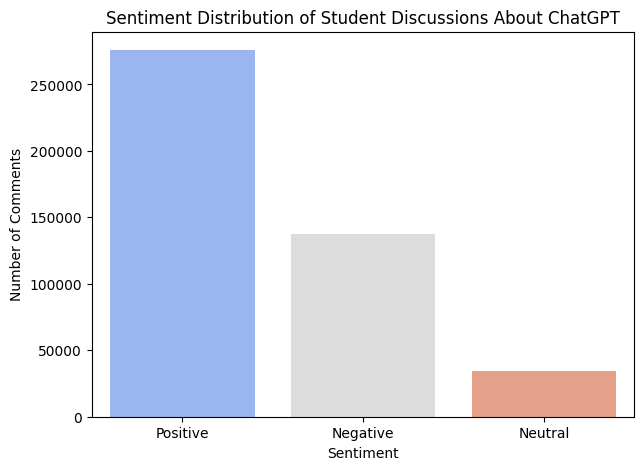

In [4]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution of Student Discussions About ChatGPT')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

## Top Positive and Negative Comments

In [5]:
print("Top Positive Comments:")
display(df[df['sentiment'] == 'Positive'].sort_values(by='sentiment_score', ascending=False).head(5))

print("Top Negative Comments:")
display(df[df['sentiment'] == 'Negative'].sort_values(by='sentiment_score').head(5))

Top Positive Comments:


,subreddit,body,controversiality,score,comment_id,comment_parent_id,comment_body,Topic,Tag,sentiment_score,sentiment
168838,NaN,can i answer all of them? i've got a mellow ni...,NaN,2.0,NaN,NaN,NaN,3.0,Teenage,0.9999,Positive
298363,NaN,"last year, someone came to this sub with an ar...",NaN,1.0,NaN,NaN,NaN,2.0,Religion,0.9999,Positive
221367,NaN,reminds me of this post:\n\nouch. sounds like...,NaN,2.0,NaN,NaN,NaN,3.0,Teenage,0.9999,Positive
211269,NaN,"not links, per se, but there are some links an...",NaN,2.0,NaN,NaN,NaN,3.0,Teenage,0.9999,Positive
214033,NaN,"hi there, welcome to the fun place :d\n\ni *us...",NaN,2.0,NaN,NaN,NaN,3.0,Teenage,0.9999,Positive


Top Negative Comments:


,subreddit,body,controversiality,score,comment_id,comment_parent_id,comment_body,Topic,Tag,sentiment_score,sentiment
294078,NaN,**full list of deaths**\n\nmarch 1982: profess...,NaN,1.0,NaN,NaN,NaN,22.0,Nature,-0.9999,Negative
352541,NaN,**most popular comments** \n\n---\n|score|au...,NaN,1.0,NaN,NaN,NaN,29.0,Comments,-0.9999,Negative
368459,NaN,&gt;&gt; your article says queen elizabeth too...,NaN,1.0,NaN,NaN,NaN,30.0,Gender,-0.9999,Negative
430950,NaN,"""fuck the police""\n\n[mc ren as court officer]...",NaN,-1.0,NaN,NaN,NaN,3.0,Teenage,-0.9999,Negative
302661,NaN,&gt; i honestly don't beleive yiuve read the q...,NaN,1.0,NaN,NaN,NaN,9.0,Arg,-0.9999,Negative


## Subreddit-wise Sentiment

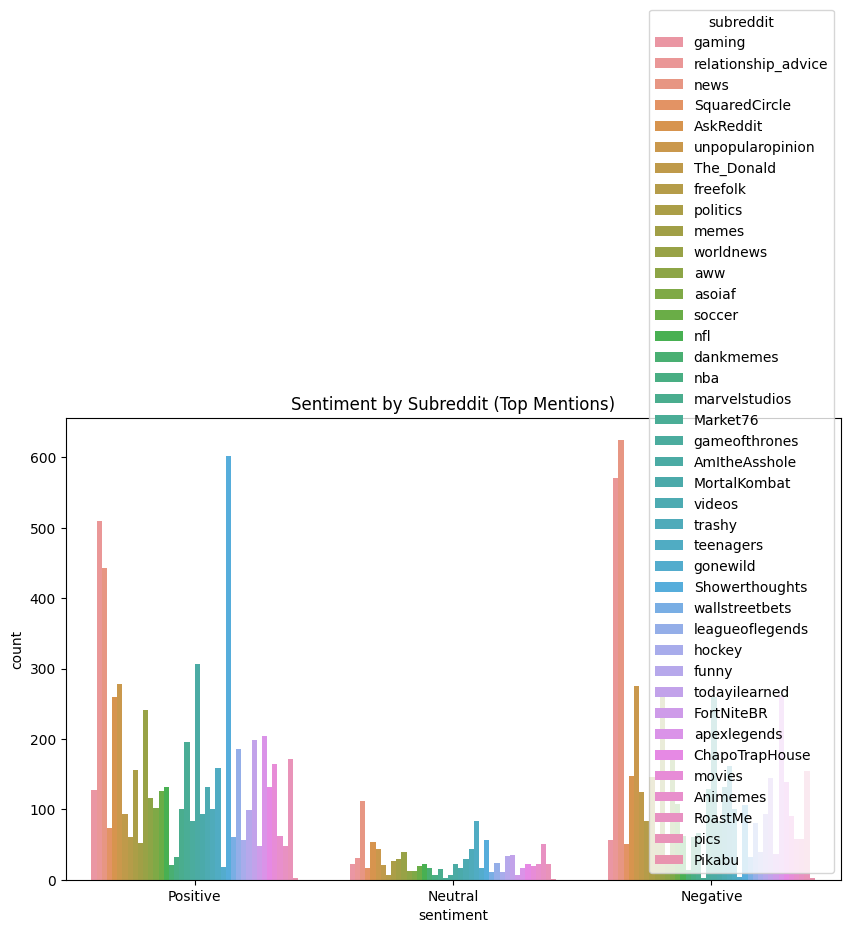

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sentiment', hue='subreddit', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment by Subreddit (Top Mentions)')
plt.xticks(rotation=0)
plt.show()

## Save Result

In [7]:
df.to_csv('student_chatgpt_sentiment.csv', index=False)

<div style="background-color: #e6f7ff; padding: 15px; border-radius: 10px;">
  <h3> Insights</h3>
  <ul>
    <li>Most comments were <strong>positive</strong>, indicating students appreciate ChatGPT’s support.</li>
    <li>Negative comments often involve ethical concerns or confusion about using it effectively.</li>
    <li>Subreddit sentiment varies based on community focus.</li>
  </ul>
  <p>
    This sentiment analysis helps understand real user experiences and can guide further research in AI-assisted education.
  </p>
</div>